<center>
    <img src=https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png style=width: 600px;/> 
</center>

<div align="center"><span style="font-family:Arial Black;font-size:33px;color:darkblue"> Master Economie Finance </span></div>


<div align="center"><span style="font-family:Arial Black;font-size:27px;color:darkblue">Index Construction</span></div>

# Definition

A financial index is a statistical indicator that reflects the change in value of a set of financial assets, such as stocks, bonds, or other financial instruments.
It is used to:
- Measure the performance of a given market or sector.
- Serve as a benchmark for financial products (ETFs, index funds, etc.).
- Compare returns between different asset classes.

Examples of well-known financial indices: CAC 40 (France), Stoxx Europe 600 (Europe), S&P 500 (United States).

An index is not a financial instrument in itself, since it cannot be traded (bought or sold). It does not represent a monetary value but rather a reference value. An investor wishing to gain exposure to the risk represented by a given index generally uses an ETF, which is designed to replicate the chosen financial index.

**Index Composition**

Selection criteria: The index groups companies according to factors such as:
- Size (market capitalization)
- Industry sector
- Country or geographic area

Examples: CAC 40: 40 largest French companies listed on Euronext Paris, S&P 500: 500 largest listed U.S. companies.

Although thematic indices are the most common, other more complex indices exist. If an investment strategy can be defined based on a set of rules, it can be expressed in the form of an index.

**Weighting Methods**

- Market capitalization weighting: Each company has a weight proportional to its market capitalization.
- Equal weighting: Each company has the same weight in the index at the time of rebalancing.
- Risk-based weighting: Each company is weighted according to its volatility or another risk indicator.

**Calculation of the Index Value**

Once the investment universe is defined and the weighting method chosen, the index value/performance is calculated at set intervals, generally on a daily basis.

**Index Rebalancing**

Index rebalancing is the process by which the composition or weighting of the securities that make up a stock index is periodically adjusted.
This ensures that the index remains representative of the market or sector it measures. Rebalancing may include:
- Adding new companies that meet the criteria.
- Removing companies that no longer meet the requirements.

Index rebalancing also helps manage weighting drift between rebalancing dates.

The rebalancing frequency is defined before the index is launched; it can be monthly, quarterly, or yearly. Some market events can trigger exceptional rebalancing (e.g., a volatility spike for certain indices based on a quantitative strategy).


# Part I - Import and Retrieval of the Required Data

For this practical work, we will use Yahoo Finance to retrieve financial data. Other free alternatives exist, however: Stooq, Alpha Vantage, Quandl. Alpha Vantage and Quandl, however, require working with APIs.

For those who wish to access the implementation of yfinance, it is available here: https://github.com/ranaroussi/yfinance

In [76]:
!pip install yfinance pandas_datareader pandas numpy matplotlib scipy numba seaborn --quiet

In [77]:
# import of the libraries required for the project
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import scipy.stats as st
import textwrap
import pprint

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib.ticker import FuncFormatter
from pandas_datareader import data as pdr
from typing import Union, Tuple, List, Dict

In [78]:
# Data retrieval via yfinance - understanding how to use the yfinance package

ticker_test = "TTE.PA"
stock = yf.Ticker(ticker_test)

# The variable stock is an object containing numerous data and functionalities.
# To display all the methods and attributes of the object, we can use Python's native function dir().
dir(stock)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_funds_data',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_message_handler',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_targets',
 'balance_sheet',
 'balancesheet',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_estimate',
 'earnings_history',
 'eps_revisions',
 'eps_tr

In [79]:
# The attribute info allows displaying the main characteristics of the object.
stock_info = stock.info
print("The variable stock_info has the following type ", type(stock_info))
print("")
print("Data available data in the  :\n")
pprint.pprint(stock_info, indent=4, width=80, sort_dicts=False)
print()
# To access one of the info data points, we just need to provide the desired key, since the variable is a dictionary.
print("The free float of ", stock_info.get("longName"), " is ", stock_info.get("floatShares"))

The variable stock_info has the following type  <class 'dict'>

Data available data in the  :

{   'address1': 'Tour Coupole - 2',
    'address2': 'Place Jean Millier Paris la Défense cedex',
    'city': 'Courbevoie',
    'zip': '92078',
    'country': 'France',
    'phone': '33 1 47 44 60 00',
    'website': 'https://www.totalenergies.com',
    'industry': 'Oil & Gas Integrated',
    'industryKey': 'oil-gas-integrated',
    'industryDisp': 'Oil & Gas Integrated',
    'sector': 'Energy',
    'sectorKey': 'energy',
    'sectorDisp': 'Energy',
    'longBusinessSummary': 'TotalEnergies SE, a multi-energy company, produces '
                           'and markets oil and biofuels, natural gas, biogas '
                           'and low-carbon hydrogen, renewables, and '
                           'electricity in France, rest of Europe, and '
                           'internationally. It operates through five '
                           'segments: Exploration & Production, Integrated 

Our first objective is to build a French stock index that tracks the 20 largest French companies in terms of market capitalization over a 10-year period.
To do this, we need to retrieve the following historical data: closing price, market capitalization.

In [81]:
tickers = [
    'ACA.PA',   # Crédit Agricole
    'BN.PA',    # Danone
    'DSY.PA',   # Dassault Systèmes
    'ENGI.PA',  # Engie
    'RMS.PA',   # Hermès
    'KER.PA',   # Kering
    'OR.PA',    # L'Oréal
    'MC.PA',    # LVMH
    'ML.PA',    # Michelin
    'ORA.PA',   # Orange
    'RI.PA',    # Pernod Ricard
    'PUB.PA',   # Publicis Groupe
    'RNO.PA',   # Renault
    'SAF.PA',   # Safran
    'SGO.PA',   # Saint-Gobain
    'SAN.PA',   # Sanofi
    'SU.PA',    # Schneider Electric
    'GLE.PA',   # Société Générale
    'TEP.PA',   # Teleperformance
    'HO.PA',    # Thales
    'TTE.PA',   # TotalEnergies
    'URW.PA',   # Unibail-Rodamco-Westfield
    'DG.PA',    # Vinci
    'VIV.PA',   # Vivendi
    'WLN.PA',   # Worldline
    'AC.PA',    # Accor
    'ALO.PA',   # Alstom
    'ERF.PA',   # Eurofins Scientific
    'EDEN.PA',  # Edenred
    'LI.PA',    # Klépierre
]

# We will download 10 years of historical data for our stock universe.
end_date = dt.datetime.now() - dt.timedelta(days=1)
start_date = end_date - relativedelta(years=10)

input_data_from_yf = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True) #permet la récupération des données suivantes : Close, High, Low, Open, Volume.
close_data_from_yf = input_data_from_yf['Close']
path_to_store_data = os.getcwd()
close_data_from_yf.to_csv(path_to_store_data + '/close_data_historical_10y.csv')

# The number of shares is not available historically in Yahoo Finance. We will therefore use a CSV file containing this information.
number_of_shares_data_historical = pd.read_csv(path_to_store_data +'/number_of_shares_data_historical_10y.csv')

[*********************100%***********************]  30 of 30 completed


# Part II - Index Construction Methodology

## Formula for defining the weights of index constituents

* **Equal weighting**: \$w\_i = 1/N\$.
* **Market-cap weighting**: \$w\_i = \frac{cap\_i}{\sum\_j cap\_j}\$.
* **Custom weighting**: score followed by normalization \$w\_i \propto score\_i\$.

### Formula for determining the value of a market-cap weighted index

Index value (base):

$$
I_t = \frac{\sum_{i=1}^N w_{i,t} \, P_{i,t}}{D}
$$

where \$D\$ is a divisor that ensures the continuity of the index during corporate actions.

## Eligibility rules and common filters applied when defining the investment universe

Examples:

* Minimum free-float market capitalization
* Minimum average daily volume (ADV)
* ESG criteria (exclusion of tobacco producers, controversial weapons, or companies generating energy from coal)

## Calculation of weights and base value — implementation

### Data cleaning

Write a function `clean_data(close_df, shares_df)` that:

* Identifies the tickers common to both DataFrames.
* Aligns the common dates.
* Returns the two cleaned, comparable DataFrames.

### Market capitalization calculation

Write a function `compute_market_cap(prices, shares_outstanding)` that:

* Takes as input two dictionaries (prices and number of shares).
* Calculates each company’s market capitalization.

### Selection of the largest capitalizations

On the initial date, select the 20 companies with the highest market capitalization.

Store their capitalizations in a dictionary `top_20_mkt_cap`.

### Calculation of the index weights

Write a function `compute_weights(market_caps)` that calculates the relative weight of each security within the index.

### Initial composition of the index

* Load the closing prices and the number of shares from the CSV file.
* Apply the `clean_data` function to both DataFrames.
* Extract the closing prices and the number of shares for the first date in the cleaned DataFrames.
* Compute the market capitalization of each company.
* Sort the companies by market capitalization and keep only the 20 largest.
* Compute the portfolio weights of the selected securities.


In [84]:
def clean_data(close_df: pd.DataFrame, shares_df: pd.DataFrame)-> Tuple[pd.DataFrame, pd.DataFrame]:
    # Get the intersection of columns (tickers) between the two datasets
    common_tickers = close_df.columns.intersection(shares_df.columns)
    # Get the intersection of index (dates) between the two datasets
    common_dates = close_df.index.intersection(shares_df.index)
    
    # Keep only the common tickers in both DataFrames
    close_df = close_df[common_tickers]
    shares_df = shares_df[common_tickers]
    
    # Keep only the common dates in both DataFrames
    close_df = close_df.loc[common_dates]
    shares_df = shares_df.loc[common_dates]
    
    return close_df, shares_df
    

def compute_market_cap(prices: dict, shares_outstanding: dict) -> Dict[str, float]:
    # Compute market capitalization for each security
    market_cap = {}
    for k in prices.keys():
        close_price = prices.get(k, 0)
        shares = shares_outstanding.get(k, 0)
        market_cap[k] = close_price * shares
    return market_cap

def compute_weights(market_caps: dict) -> Dict[str, float]:
    # Compute the relative weights of each security in the index
    weights = {}
    total_mkt_cap = sum(market_caps.values())
    for k, v in market_caps.items():
        weights[k] = v / total_mkt_cap if total_mkt_cap > 0 else 0
    return weights

# Load the data
close_data_from_yf = pd.read_csv('close_data_historical_10y.csv', index_col=0, parse_dates=True)
number_of_shares_data_historical = pd.read_csv('number_of_shares_data_historical_10y.csv', index_col=0, parse_dates=True, dayfirst=True)

close_data_from_yf, number_of_shares_data_historical = clean_data(close_data_from_yf, number_of_shares_data_historical)
print(f"After cleaning, both DataFrames contain {len(close_data_from_yf.columns)} tickers:\n")
print(textwrap.fill("   ".join(close_data_from_yf.columns), width=80, subsequent_indent="") + "\n")

# Initialize the index composition
first_date = close_data_from_yf.index[0]  # Index start date
close_data_dict = close_data_from_yf.loc[first_date].to_dict()  # Closing prices on the initial date
shares_data_dict = number_of_shares_data_historical.loc[first_date].to_dict()  # Shares outstanding on the initial date

# Compute market capitalizations
market_cap_dict = compute_market_cap(close_data_dict, shares_data_dict)

# Since we want to build a CAC 20, sort to keep only the 20 largest market caps
top_20_mkt_cap = dict(sorted(market_cap_dict.items(), key=lambda x: x[1], reverse=True)[:20])
print("The dict containing the top 20 market caps is:\n")
pprint.pprint(top_20_mkt_cap, indent=4, width=80, sort_dicts=False)
print()

# Compute weights of the selected securities
wgt = compute_weights(top_20_mkt_cap)
print("The dict containing the index’s initial weights is:\n")
pprint.pprint(wgt, indent=4, width=80, sort_dicts=False)
print()

After cleaning, both DataFrames contain 30 tickers:

AC.PA   ACA.PA   ALO.PA   BN.PA   DG.PA   DSY.PA   EDEN.PA   ENGI.PA   ERF.PA
GLE.PA   HO.PA   KER.PA   LI.PA   MC.PA   ML.PA   OR.PA   ORA.PA   PUB.PA
RI.PA   RMS.PA   RNO.PA   SAF.PA   SAN.PA   SGO.PA   SU.PA   TEP.PA   TTE.PA
URW.PA   VIV.PA   WLN.PA

The dict containing the top 20 market caps is:

{   'OR.PA': 77474377717.76428,
    'SAN.PA': 76002260687.29099,
    'MC.PA': 69137156362.8006,
    'TTE.PA': 60444214630.73692,
    'RMS.PA': 32751511224.8407,
    'BN.PA': 27761568327.232475,
    'SAF.PA': 26428805153.95466,
    'DG.PA': 25330567942.18479,
    'SU.PA': 23558530802.147827,
    'GLE.PA': 20539324918.982315,
    'ORA.PA': 20436851786.90481,
    'RI.PA': 20317720539.086914,
    'ENGI.PA': 18870679218.73419,
    'SGO.PA': 17449163586.90691,
    'RNO.PA': 16552143233.97667,
    'ACA.PA': 15485573626.021385,
    'KER.PA': 14842345353.036804,
    'HO.PA': 10813910161.36097,
    'PUB.PA': 10174485005.196114,
    'AC.PA': 87248

## Implementation Part 2 – index value calculation and rebalancing

### Convert the DataFrames to facilitate data manipulation:

From the two DataFrames `close_data_from_yf` and `number_of_shares_data_historical`, create two dictionaries that map each date to a sub-dictionary containing the corresponding values for each stock.

### Defining the rebalancing dates

Define the rebalancing dates as the last business day of each year.
Store these dates in a list `rebalancing_dates`.

### Initializing the index

Set the initial index value to **100** at the first available rebalancing date.
Create a dictionary `portfolio_value` to store the index value at each rebalancing date.

---

### Annual rebalancing loop

For each period between two rebalancing dates:

* Compute market capitalizations at the start date of the period.
* Select the 20 largest market capitalizations.
* Compute the relative weights of the selected securities in the index.
* Compute each security’s return up to the next period.
* Compute the portfolio return.
* Update the index value at the end of the period.


Index level over time:

2015-12-30    100.000000
2016-12-30    111.912756
2017-12-29    129.400948
2018-12-31    130.943746
2019-12-31    172.173164
2020-12-31    177.415188
2021-12-31    239.129207
2022-12-30    221.457653
2023-12-29    266.715030
2024-12-31    264.754100
dtype: float64


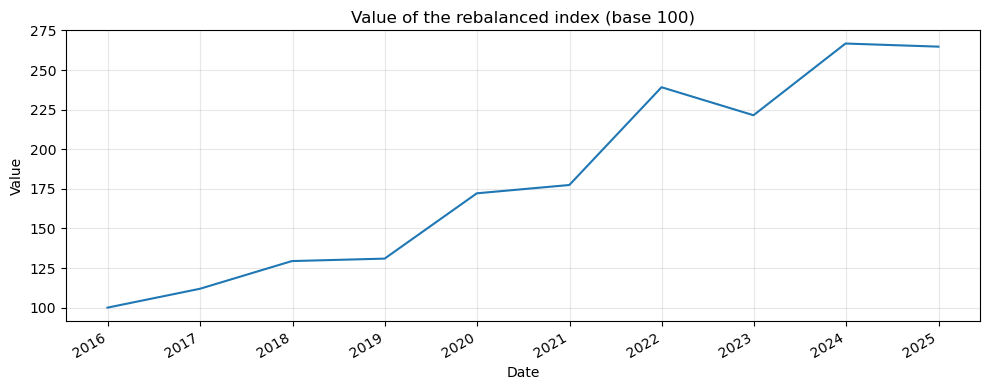

In [86]:
# We now want to extend the index construction to include an annual rebalancing
dates = list(close_data_from_yf.index)
close_dict = {d: close_data_from_yf.loc[d].to_dict() for d in dates}
shares_dict = {d: number_of_shares_data_historical.loc[d].to_dict() for d in dates}

portfolio_value = dict()

# Definition of rebalancing dates: here, the last observation of each year
rebalancing_dates = close_data_from_yf.groupby(close_data_from_yf.index.year).apply(lambda x: x.index.max()).tolist()
if len(rebalancing_dates) < 2:
    raise ValueError("Not enough rebalancing dates to compute performance.")

# Initialization: index value set to 100 at the start
first_rebalancing_date = rebalancing_dates[0]
portfolio_value[first_rebalancing_date] = 100.0

# Loop over each rebalancing period (year by year)
for i, date in enumerate(rebalancing_dates[:-1]):
    start_date = date
    end_date = rebalancing_dates[i+1]

    # Compute market capitalizations at the rebalancing date
    mkt_caps = compute_market_cap(close_dict[start_date], shares_dict[start_date])
    # Select the 20 largest market caps
    top_20 = dict(sorted(mkt_caps.items(), key=lambda x: x[1], reverse=True)[:20])
    # Compute the corresponding weights
    weights = compute_weights(top_20)

    # Prices at the start and end of the period
    start_price = close_dict.get(start_date)
    end_price = close_dict.get(end_date)

    tickers = list(weights.keys())
    total_contribution = 0

    # Compute each stock’s contribution to the portfolio return
    for ticker in tickers:
        start_price_for_ticker = start_price.get(ticker)
        end_price_for_ticker = end_price.get(ticker)
        stock_return = end_price_for_ticker / start_price_for_ticker - 1.0
        stock_contribution = stock_return * weights.get(ticker)
        total_contribution += stock_contribution

    # Update the portfolio value at the end of the period
    portfolio_value[end_date] = portfolio_value[start_date] * (1 + total_contribution)

# Convert the dict to a Pandas Series and sort by date
pv_series = pd.Series(portfolio_value).sort_index()
print("Index level over time:\n")
print(pv_series)

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
pv_series.plot(ax=ax)
ax.set_title("Value of the rebalanced index (base 100)")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Here’s the English translation with the same formatting preserved:

---

## Part 3 – Encapsulate the code and make the rebalancing frequency configurable

### Objective

Encapsulate the provided code into **a single function** and allow the user to choose the **rebalancing frequency** among: *annual*, *quarterly*, *monthly*, or *daily*.
We will **reuse as much as possible** from the existing code (dictionary construction, selection/weighting logic, update loop).

1. **Function signature**
   Create a function (name `build_index_with_rebalancing`) with the following signature:

* **Inputs**:

  * `close_data_from_yf: pd.DataFrame` (date index, ticker columns, closing prices)
  * `number_of_shares_data_historical: pd.DataFrame` (same structure, number of shares)
  * `frequency: str` in `{"annual", "quarterly", "monthly", "daily"}` (default value: `"annual"`)
    
* **Outputs**:

  * `pv_series: pd.Series` sorted by date (index value, base 100)

2. **Configuring the rebalancing frequency**

* Set up a **mapping** between `frequency` and a rule for aggregating by period:

  * `"annual"` → last business day of each **year**
  * `"quarterly"` → last business day of each **quarter**
  * `"monthly"` → last business day of each **month**
  * `"daily"` → every **available day** (equivalent to rebalancing daily)
* Expected implementation: group the price index by period (year/quarter/month/day) and **take the last observation** of each period, as in the existing annual code (generalized to other periodicities).

3. **Index initialization**

* Set the initial value to **100.0** at the **first** available rebalancing date.

4. **Rebalancing loop (generalize the existing logic)**

* Reuse the rebalancing logic implemented earlier.

6. **Compare the impact of rebalancing frequency on index performance**

* Run the code for all frequencies and display the results.

### Notes

* **Reuse** as much of the provided code as possible (dictionaries, sorting by market cap, computing weights and contributions).
* The financial logic (top 20 by market cap, cap-weighted weights, simple returns) **remains the same**; only the **definition of rebalancing dates** becomes configurable via `frequency`.
* **Test your code with an annual rebalancing frequency to ensure you obtain the same results as before.**


In [88]:
import pandas as pd
import matplotlib.pyplot as plt

def build_index_with_rebalancing(
    close_data_from_yf: pd.DataFrame,
    number_of_shares_data_historical: pd.DataFrame,
    frequency: str = "annual",           # "annual" | "quarterly" | "monthly" | "daily"
    n_constituents: int = 20,
    base_value: float = 100.0,
    return_details: bool = True) -> Union[pd.Series, Tuple[pd.Series, List[Dict[str, object]]]]:
    """
    Build the value series of an index rebalanced at the chosen frequency.
    - Prices and shares are provided as DataFrames (date index, ticker columns).
    - The N largest market caps are selected at each rebalancing date.
    - Weights are proportional to market capitalization.
    - Period return = P_end / P_start - 1 per stock, aggregated by weights.

    Assumptions: data are already cleaned/aligned, and helper functions are available:
      - compute_market_cap(close_row_dict, shares_row_dict) -> dict{ticker: cap}
      - compute_weights(top_caps_dict) -> dict{ticker: weight}
    """

    # 1) DataFrames -> dictionaries (reusing your approach)
    dates = list(close_data_from_yf.index)
    close_dict  = {d: close_data_from_yf.loc[d].to_dict() for d in dates}
    shares_dict = {d: number_of_shares_data_historical.loc[d].to_dict() for d in dates}

    # 2) Rebalancing dates = last observation of each period
    freq_map = {
        "annual": "Y",
        "quarterly": "Q",
        "monthly": "M",
        "weekly": "W",   # optional: keep if useful
        "daily": "D",
    }

    if frequency not in freq_map:
        raise ValueError("frequency must be one of {'annual','quarterly','monthly','daily'} (or 'weekly').")

    period_alias = freq_map[frequency]
    rebalancing_dates = (
        close_data_from_yf
        .groupby(close_data_from_yf.index.to_period(period_alias))
        .tail(1)
        .index
    )
    if len(rebalancing_dates) < 2:
        raise ValueError("Not enough rebalancing dates to compute performance.")

    portfolio_value = {}
    first_rebalancing_date = rebalancing_dates[0]
    portfolio_value[first_rebalancing_date] = float(base_value)

    # Optional: period log
    details = []

    # 3) Rebalancing loop across periods
    for i, start_date in enumerate(rebalancing_dates[:-1]):
        end_date = rebalancing_dates[i + 1]

        # Market caps at the rebalancing date (reuse)
        mkt_caps = compute_market_cap(close_dict[start_date], shares_dict[start_date])

        # Select top-N caps (reuse)
        top_n = dict(sorted(mkt_caps.items(), key=lambda x: x[1], reverse=True)[:n_constituents])

        # Corresponding weights (reuse)
        weights = compute_weights(top_n)

        start_price = close_dict.get(start_date)
        end_price   = close_dict.get(end_date)

        # Aggregate portfolio return (reuse)
        total_contribution = 0.0
        for ticker in weights.keys():
            sp = start_price.get(ticker)
            ep = end_price.get(ticker)
            # Basic safety against missing/zero values
            if sp is None or ep is None or sp == 0:
                continue
            stock_return = ep / sp - 1.0
            total_contribution += stock_return * weights.get(ticker, 0.0)

        # Update index value
        portfolio_value[end_date] = portfolio_value[start_date] * (1.0 + total_contribution)

        if return_details:
            details.append({
                "start": start_date,
                "end": end_date,
                "selected": list(weights.keys()),
                "weights": dict(weights),
                "portfolio_return": total_contribution,
                "value_start": portfolio_value[start_date],
                "value_end": portfolio_value[end_date],
            })

    pv_series = pd.Series(portfolio_value).sort_index()

    if return_details:
        return pv_series, details
    return pv_series


Preview of index values (all frequencies):
                annual   quarterly     monthly      weekly
2015-12-30  100.000000  100.000000   94.925989   98.354732
2016-12-30  111.912756  111.979412  106.262575  109.813438
2017-12-29  129.400948  129.528978  122.904425  127.013979
2020-12-31  177.415188  176.849638  168.881320  174.076360
2021-12-31  239.129207  238.489522  227.980851  235.863618
2022-12-30  221.457653  221.088471  211.159090  217.596168
2023-12-29  266.715030  266.203988  254.389216  262.178058
2024-12-31  264.754100  264.279134  252.544440  260.279771

Table of annual performances (%):
      annual quarterly monthly  weekly
2016  11.91%    11.98%  11.94%  11.65%
2017  15.63%    15.67%  15.66%  15.66%
2018   1.19%     1.21%   1.20%  -0.14%
2019  31.49%    31.76%  31.85%  34.78%
2020   3.04%     2.38%   2.98%   1.83%
2021  34.79%    34.85%  34.99%  35.49%
2022  -7.39%    -7.30%  -7.38%  -7.74%
2023  20.44%    20.41%  20.47%  20.49%
2024  -0.74%    -0.72%  -0.73%  -0.72%


/var/folders/9h/g7kp790x7_d8yvgr15gq4prr0000gp/T/ipykernel_19327/1127896184.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(perf_df.applymap(lambda x: f"{x:.2%}"))


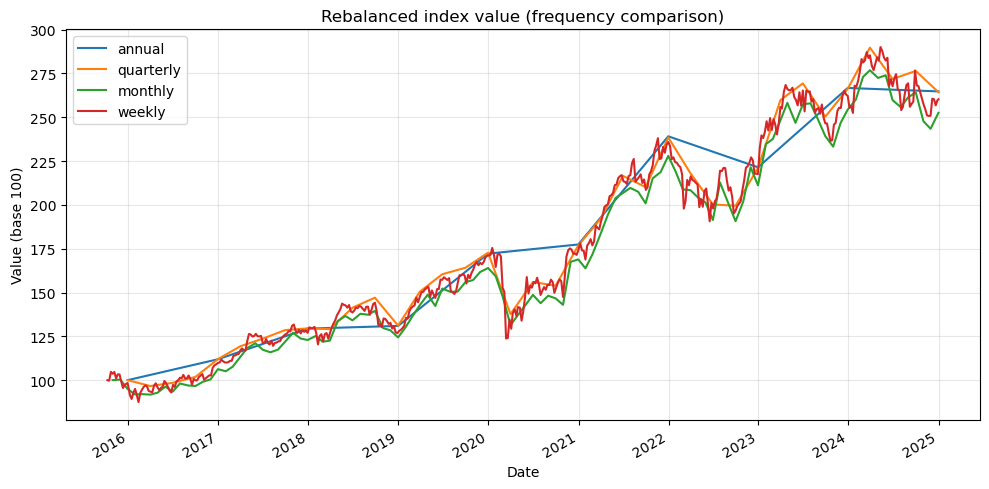

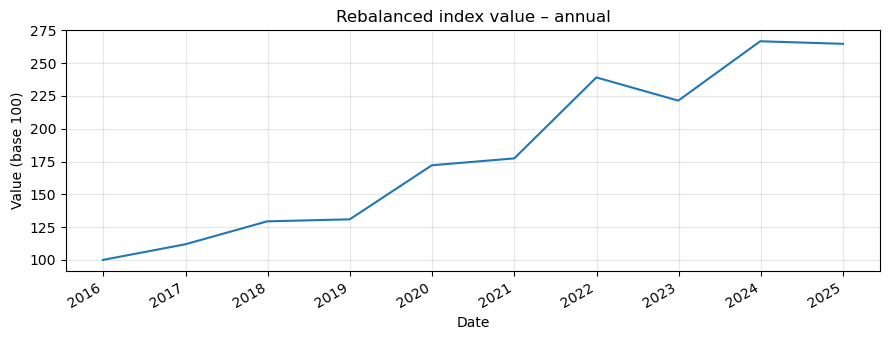

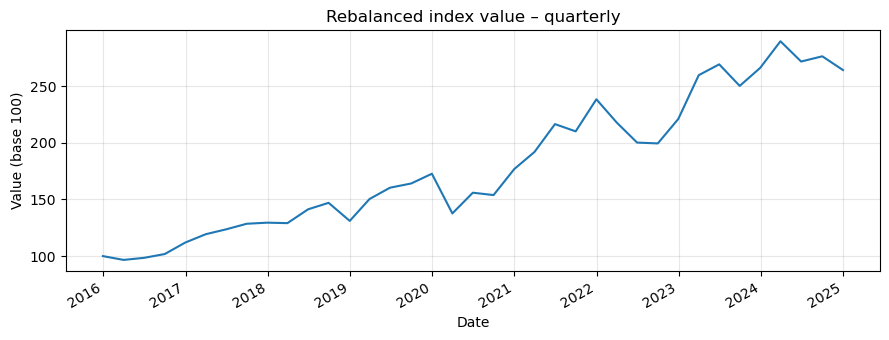

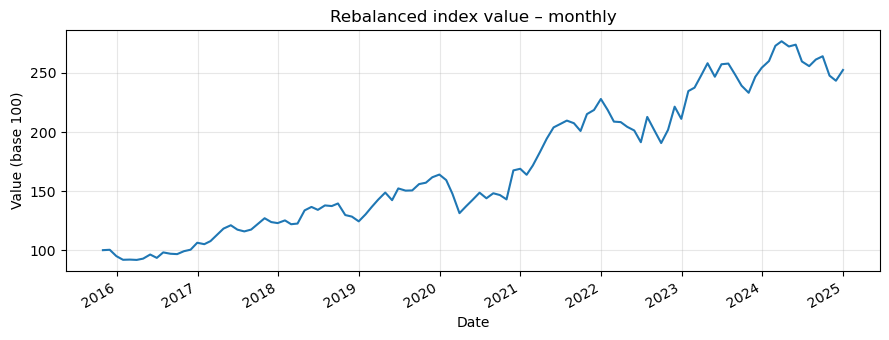

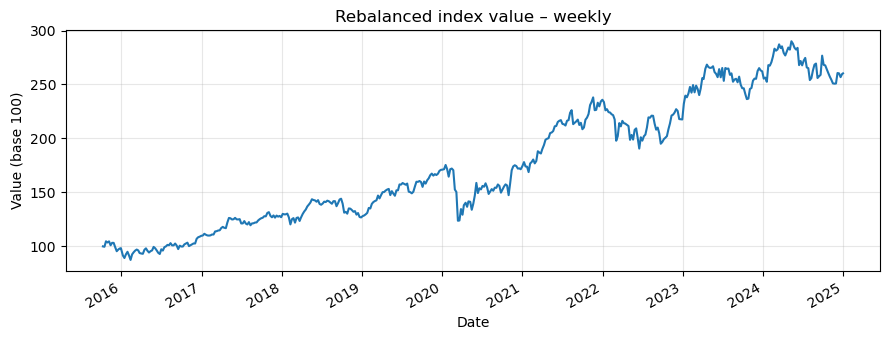

In [89]:
frequencies = ["annual", "quarterly", "monthly", "weekly"]
results = {} 
details_log = {}

# Build the index for each rebalancing frequency
for freq in frequencies:
    pv_series, details = build_index_with_rebalancing(
        close_data_from_yf=close_data_from_yf,
        number_of_shares_data_historical=number_of_shares_data_historical,
        frequency=freq,
        n_constituents=20,
        base_value=100.0,
        return_details=True
    )
    results[freq] = pv_series
    details_log[freq] = details

# Combine into a DataFrame for comparison
pv_df = pd.concat(results, axis=1)  # multi-index columns (freq, series)
pv_df.columns = pv_df.columns.droplevel(1) if isinstance(pv_df.columns, pd.MultiIndex) else pv_df.columns
pv_df = pv_df.sort_index()

print("Preview of index values (all frequencies):")
print(pv_df.dropna())

# Annual performance calculation
annual_perf = {}
for freq, ser in results.items():
    yearly = ser.groupby(ser.index.year).last().pct_change().dropna()
    annual_perf[freq] = yearly

perf_df = pd.DataFrame(annual_perf)

print("\nTable of annual performances (%):")
print(perf_df.applymap(lambda x: f"{x:.2%}"))

# Plot comparison of all frequencies
plt.figure(figsize=(10, 5))
for freq, ser in results.items():
    ser.plot(label=freq)
plt.title("Rebalanced index value (frequency comparison)")
plt.xlabel("Date")
plt.ylabel("Value (base 100)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Individual plots per frequency
for freq, ser in results.items():
    fig, ax = plt.subplots(figsize=(9, 3.5))
    ser.plot(ax=ax)
    ax.set_title(f"Rebalanced index value – {freq}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Value (base 100)")
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
